In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qutip import*
from numpy import *

In [2]:
wc = 1.0*2.0*np.pi
wa = 1.0*2.0*np.pi
g = 0.25*2*np.pi
kappa = 0.005
gamma = 0.05
N = 50
n_th_a=0.0
tlist = linspace(0.0, 1000,1000)


In [3]:
psi0 = tensor (basis(N,0), basis(2))
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
H = wc*a.dag()*a+wa*sm.dag()*sm+g*(a.dag()+a)*(sm+sm.dag())
H

Quantum object: dims=[[50, 2], [50, 2]], shape=(100, 100), type='oper', dtype=Dia, isherm=True
Qobj data =
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           6.28318531   1.57079633 ...   0.           0.
    0.        ]
 [  0.           1.57079633   6.28318531 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 307.87608005  10.99557429
    0.        ]
 [  0.           0.           0.         ...  10.99557429 307.87608005
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  314.15926536]]

In [4]:
c_ops = []
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)
# cavity excitation,
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())
# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)


In [5]:
output= mesolve(H, psi0, tlist,  c_ops=c_ops, e_ops=[a.dag() * a, sm.dag() * sm])
output

<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0
    preparation time: 0.0009968280792236328
    run time: 408.09530901908875
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 1000.0] (1000 steps)
  Number of e_ops: 2
  State not saved.
>

Text(0.5, 1.0, 'CRW Vacuum Rabi oscillations')

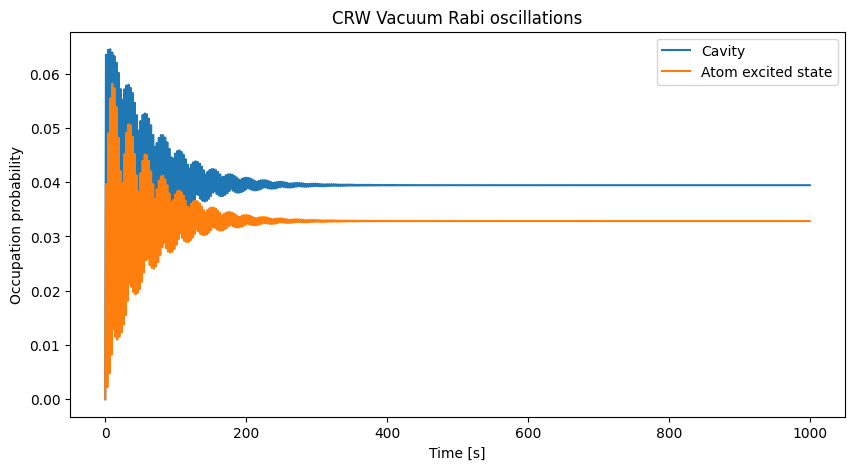

In [6]:
n_c = output.expect[0]
n_a = output.expect[1]
fig,axes = plt.subplots(1,1,figsize=(10,5))
axes.plot(tlist,n_c,label='Cavity')
axes.plot(tlist,n_a,label='Atom excited state')
axes.legend()
axes.set_xlabel('Time [s]')
axes.set_ylabel('Occupation probability')
axes.set_title('CRW Vacuum Rabi oscillations')